![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def veryclose(a, b):
    return np.isclose(a, b, rtol=1e-12, atol=1e-12)

# Funcionário básico

In [3]:
def newton(f, df, x0, y, maxiter=100, xtol=1e-12, ytol=1e-12):
    """Método de Newton para encontrar uma raiz de  f(x) = y  começando de  x0."""
    def fun(x):
        return f(x) - y
    pontos = []
    for _ in range(maxiter):
        pontos.append(x0)
        x1 = x0 - fun(x0)/df(x0)
        if abs(x1-x0) <= xtol:
            pontos.append(x1)
            return pontos[-1]
        x0 = x1
    return pontos[-1]

In [4]:
assert veryclose(newton(np.sin, np.cos, 3, 0), np.pi)

In [5]:
x = newton(np.exp, np.exp, 0, 2)
assert veryclose(x, np.log(2))

In [6]:
def retangulo(f, a, b, n=1000):
    if a == b:
        return 0
    pts, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    sum = 0
    for ponto in pts:
        sum+= (f(ponto) * h)
    return sum

def trap(f, a, b, n=1000):
    if a == b:
        return 0
    pts, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    integral = 0
    for i in range(1, len(pts)):
        integral += f(pts[i])*h
    integral += ((f(a)+f(b))*h)/2
    return integral


In [7]:
assert veryclose(retangulo(np.exp, 0, 1, n=10), 1.6337993999663625)

In [8]:
assert veryclose(trap(np.sin, 1, 2, n=33), 0.9563759511250488)

# Parte 1: Encontrando raízes de integrais

Nesta questão, vamos estudar o seguinte problema:
como encontrar o primeiro (segundo, n-ésimo) $x$ tal que

$$F(x) = \int_0^x \frac{\sin(\pi t)}{\pi t} \, dt = y.$$

## Questão 1: Primitiva

Escreva uma função `F(x)` que calcula esta primitiva pelo método do trapézio.

In [9]:
def F(x, n=1000):
    """Integral de  sin(pi t)/(pi t)  de 0 a  x."""
    if x == 0:
        return 0
    return trap(np.sinc,0,x,n)

In [10]:
assert F(0) == 0

In [11]:
assert veryclose(F(1), 0.5894897889027448)

In [12]:
assert veryclose(F(2, n=10), 0.4530876922149236)

## Questão 1: Gráficos

Faça um gráfico da função $\frac{\sin \pi t}{\pi t}$ no intervalo $[0, 4]$.

Essa função é conhecida no `numpy` (e na engenharia elétrica) como `np.sinc`.

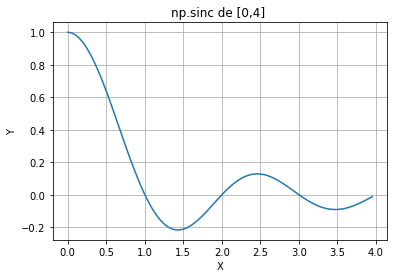

In [13]:
x = np.arange(0,4, 0.05)
def sinc(x):
    return np.sinc(x)
pontos = []

for i in x:
    pontos.append(sinc(i))
ax = plt.gca()
ax.set(xlabel='X', ylabel='Y',
       title='np.sinc de [0,4] ')
plt.plot(x,pontos)
plt.grid()



plt.show()

In [14]:
assert len(ax.lines) == 1
assert ax.get_title() != ""

ys = ax.lines[0].get_ydata()
assert np.all(-0.22 <= ys) and np.all(ys <= 1)

In [15]:
ax = None

Se estiver tudo certo, a próxima caixa também não deve dar erro:

In [16]:
for n in range(1,1000):
    assert F(1, n=n) <= F(1, n=1+n)

Explique (com ajuda do gráfico acima) porque isto ocorre.

Para explicar podemos fazer a diferença entre o valor real da integral e F(1)

In [17]:
0.5894897889027448 - F(1)

5.551115123125783e-16

Podemos perceber que nossa função está subestimando a área da função. Isto ocorre pois com um "n" maior, usaremos um maior número de trapézios, e assim a tendência é que nosso erro diminua, e nos aproximemos ainda mais da nossa função, aumentando a área preenchida com os trapézios abaixo do gráfico.

## Questão 2: Estudando a primitiva

Faça também o gráfico da primitiva $F(x)$ no intervalo $[0, 4]$.

Não use pontos demais para não demorar demais ;-)

[Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y'),
 Text(0.5, 1.0, 'Primitiva de np.sinc de [0,4] ')]

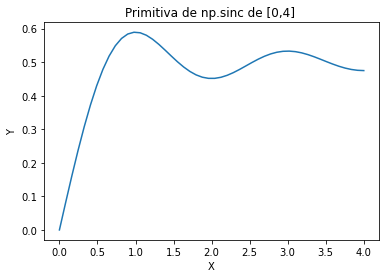

In [18]:


xs = np.linspace(0,4)
ys = [F(x) for x in xs]
plt.plot(xs,ys)
ax = plt.gca()
ax.set(xlabel='X', ylabel='Y',
       title='Primitiva de np.sinc de [0,4] ')


In [19]:
assert len(ax.lines) == 1

ys = ax.lines[0].get_ydata()
assert np.all(0 <= ys) and np.all(ys <= 0.6)

In [20]:
ax = None

Analisando este gráfico (e o anterior também),
deduza que a sequência $F(n+1) - F(n)$ (para $n$ inteiro positivo)
- converge para zero; e
- tem sinais alternados.

Para isso podemos olhar o gráfico anterior com o x de 1 até 500

[Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y'),
 Text(0.5, 1.0, 'Primitiva de np.sinc de [0,4] ')]

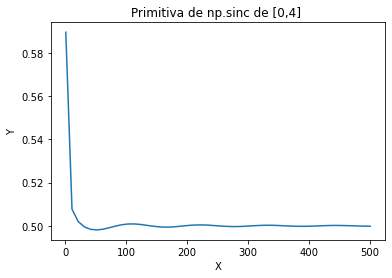

In [21]:
xs = np.linspace(1,500)
ys = [F(x) for x in xs]
plt.plot(xs,ys)
ax = plt.gca()
ax.set(xlabel='X', ylabel='Y',
       title='Primitiva de np.sinc de [0,4] ')


Assim, podemos perceber que a função a partir de 1 começa a oscilar em torno de 0.5 alternando seus sinais e convergindo a sequência para 0.

Mostre que o máximo de $F$ é atingido no ponto $x = 1$.

YOUR ANSWER HERE

Qual é a importância deste valor para o nosso problema?

YOUR ANSWER HERE

## Questão 3: Encontrando raízes

Se queremos encontrar um valor de $x$ tal que $F(x) = y$ pelo método de Newton,
precisamos

- da derivada da função $F$; e
- de um ponto inicial.

Explique qual derivada você usará para $F$.

A derivada da primitiva será a própria função original que gerou a primitiva.

Qual ponto inicial faz sentido usar para encontrar **o primeiro $x$ tal que $F(x) = y$**?

Devemos usar um ponto a esquerda do ponto máximo (1), pois assim teremos uma região crescente que irá facilitar o cálculo para o método de newton. Mas também precisamos de um porto perto o suficiente para que o método de newton funcione. Algum ponto no invertravalo (0,1), sem contar o "0" e o "1", são bons candidatos, já que não podemos escolher o 0, para não causar erro na função por divisão por 0.

Faça uma função `primeira raiz` que calcule este $x$, dado $y$.

In [22]:
def primeira_raiz(y, n=1000):
    """Calcula a primeira raiz de F(x) = y,  usando  n  intervalos para aproximar o método do trapézio."""
    return newton(F,np.sinc,0.5,y)

In [23]:
x_05 = primeira_raiz(0.5)
assert veryclose(F(x_05), 0.5)

In [24]:
assert np.isclose(x_05, 0.6132074231614169)

## Questão 4: Outras raízes

Alguns valores de $y$ podem aparecer várias vezes ao calcular a integral $F(x)$.

Quais são os valores de $y$ que podem ser atingidos pelo menos duas vezes?

Os valores de y entre o ponto máximo e o ponto mínimo local são bons candidatos, visto que, eles iniciam a sequência de oscilações na função.

Como você faria um método para encontrar esta segunda raiz de $F(x) = y$ para estes valores de $y$?

Precisamos apenas escolher um valor de y após o máximo (1)

In [25]:
def segunda_raiz(y, n=1000):
    return newton(F,np.sinc,1.1,y)

In [26]:
x_05_2 = segunda_raiz(0.5)
assert veryclose(F(x_05_2), 0.5)
assert x_05_2 > 1

In [27]:
x_055_2 = segunda_raiz(0.55)
assert veryclose(F(x_055_2), 0.55)
assert x_055_2 > 1

# Parte 2: Outro método para calcular a integral

Vamos usar 3 ideias que vimos para desenvolver um método de integração:
- o método deveria ser simétrico;
- o método deveria acertar o polinômio de maior grau possível;
- começamos estudando o método no intervalo simétrico $[-1,1]$.

## Questão 1: Dedução do método

Assim, considere um método que calcula a integral de uma função $f$ no intervalo $[-1,1]$,
usando dois pontos do **interior** do intervalo:

$$\int_{-1}^1 f(t) \, dt \simeq w_1 f(x_1) + w_2 f(x_2).$$

Deduza, da simetria, que $x_1 = -x_2$ e então que $w_1 = w_2$.

Se x1 = -x2, podemos garantir que a integral será 0, pois integrando os dois lados da função, de [-x2,0] e de [0,x1], teremos o mesmo resultado em módulo com sinais opostos, então quando integramos e somarmos, teremos 0.

Calcule os pesos $w_1 = w_2$ para que a integral numérica acerte as constantes,
ou seja, que dê a resposta exata para $f(t) = c$.

Se ft = c, quando integramos c, teremos:

c - (-c) = 2c

Logo:

2c = w1c + w2c

w1 + w2 = 2

w1 = w2 = 1

Enfim, calcule $x_1$ para que o lado direito acerte a função quadrática $f(t) = t^2$.

Calculando integral de t² teremos 2/3.

2/3 = w1(x1)² + w2(x2)²

Sendo w1 = w2 = 1 e x1 = -x2:


2/3 = w1x2² + w1x2²

2/3 = 2 * x²

x = 1/(3)^1/2

## Questão 2: Implementação

Escreva o método `sym2` que usa os 2 pontos simétricos deduzidos acima,
em cada um dos `n` sub-intervalos em que será dividido o intervalo $[a,b]$.

In [28]:
def sym2(f, a, b, n=1000):
    """Método de integração usando 2 pontos interiors simétricos, com  n  subdivisões."""
    pts, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    # YOUR CODE HERE
    raise NotImplementedError()

In [29]:
assert veryclose(sym2(np.exp, 0, 1), np.exp(1) - 1)

NotImplementedError: 

In [ ]:
assert veryclose(sym2(np.sin, 0, np.pi), 2)

In [ ]:
v = sym2(np.sin, 0, np.pi, n=100)
assert     np.isclose(v, 2, rtol=1e-8,  atol=1e-8)
assert not np.isclose(v, 2, atol=1e-10, rtol=1e-10)

In [ ]:
def invsqr(x):
    return 1/np.sqrt(x)

assert veryclose(sym2(invsqr, 1, 2), 2*(np.sqrt(2) - 1))

## Questão 3: Decaimento dos erros

Faça um gráfico do erro de integração, ao aumentar o número de subdivisões, para
- $\int_0^\pi \sin(t) \, dt$;
- $\int_0^1 \exp(t) \, dt$;
- $\int_1^2 \frac{1}{\sqrt{t}} dt$.

In [ ]:
ns = np.logspace(1, 15, dtype=int, base=2, num=29)

# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert ax.get_title() != ""
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3

In [ ]:
ax = None

O que você percebe neste gráfico?  Quão rápido decresce o erro?

YOUR ANSWER HERE

## Questão 4: Integrais com infinitos

Agora, vamos testar algo muito mais audaz:

$$\int_0^1 \frac{dt}{\sqrt{t}},$$

que é uma integral dita "imprópria";
neste caso porque o integrando não está definido (ou "vale infinito")
para uma das extremidades.

Como o método usa pontos no interior do intervalo,
ele não precisará calcular $f(0)$, que não está bem-definida.

Faça o gráfico do erro de integração, conforme $n$ aumenta,
usando `sym2`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert ax.get_title() != ""
assert len(ax.lines) == 1

In [ ]:
assert 0.1 <= max(ax.lines[0].get_ydata()) <= 1

In [ ]:
ax = None

Qual a velocidade de decaimento do erro?  Ou seja, ao fazer 10 vezes mais intervalos, quanto parece diminuir o erro?

YOUR ANSWER HERE

## Questão 5: Outro método

Também poderíamos aplicar é o método do retângulo "do outro lado",
calculando a integral de 1 até 0 (e trocando o sinal),
que também vai "driblar" a singularidade.

Verifique que o seu método do retângulo de fato troca de sinal
quando calcula uma integral "ao contrário", de $1$ até $0$:

In [ ]:
retangulo(invsqr, 1, 0)

Faça o gráfico do erro cometido pelo método do retângulo
ao aproximar a integral $\int_0^1 t^{-1/2} \, dt$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert ax.get_title() != ""
assert len(ax.lines) == 1

In [ ]:
assert 0.1 <= max(ax.lines[0].get_ydata()) <= 1

In [ ]:
ax = None

Qual a velocidade com que este erro decai?  Como este erro se compara com o anterior?

YOUR ANSWER HERE

## Questão 6 (Bônus): Análise final

Qual o erro de integração do primeiro intervalo $[0, h]$, em cada um dos métodos?

Dê a resposta exata, em função de $h$, calculando analiticamente a primitiva,
e os valores retornados pelas funções.

YOUR ANSWER HERE

Estes cálculos explicam o erro que você observou?

YOUR ANSWER HERE